In [93]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
df.dropna(inplace=True)

In [53]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
df['sex'] = df['sex'].map({'female' : 0, 'male':1})
df['smoker'] = df['smoker'].map({'no' : 0, 'yes':1})

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['region'] = encoder.fit_transform(df['region'])

In [66]:
X = df[['age', 'sex', 'smoker', 'region', 'bmi', 'children']]
y = df['charges']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7665658876405307

Text(0, 0.5, 'Predictions')

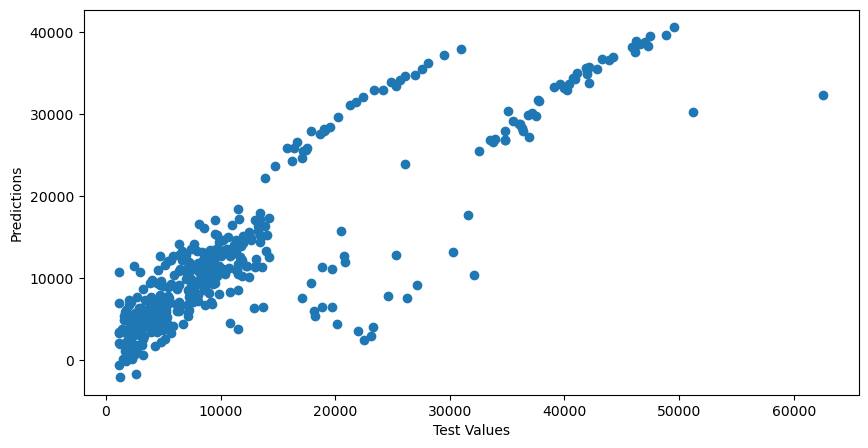

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Test Values')
plt.ylabel('Predictions')

In [67]:
X_ohe = pd.get_dummies(X, drop_first=True)
X_ohe

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [70]:
X = df[['bmi', 'smoker']]
y = df['charges']
model.fit(X, y)
print('b0 = ', model.intercept_)
print('b1 = ', model.coef_)

b0 =  -3459.0955206743056
b1 =  [  388.01524592 23593.98099851]


In [81]:
X = df[['smoker']]
y = df['charges']
model.fit(X, y)
print('b0 = ', model.intercept_)
print('b1 = ', model.coef_)

b0 =  8434.268297856215
b1 =  [23615.96353368]


In [82]:
df.groupby('smoker')['charges'].mean()

smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

In [94]:
X = df[['region']]
X_ohe = pd.get_dummies(X, drop_first=True)
y = df['charges']
model.fit(X_ohe, y)
model.intercept_, model.coef_
# print('b0 = ', model.intercept_)
# print('b1 = ', model.coef_)

(13406.384516385804, array([ -988.80914242,  1329.02692122, -1059.44713909]))

In [95]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64